In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies = pd.read_csv("C:/Users/rushikesh/Downloads/my_movies.csv")

In [4]:
movies
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, LOTR1, V3_Harry Potter1, V1_Si..."
1393,0.1,"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1..."
1394,0.1,"(V4_Green Mile, LOTR2, V3_Harry Potter1, V1_Si..."
1395,0.1,"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1..."


In [12]:
#building the model with 70% lift ratio
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V2_LOTR1),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(Green Mile),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V5_LOTR2),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [11]:
#building the model with 70% confidence 
rule1 = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.7 )
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(Sixth Sense, Harry Potter1)","(V4_Green Mile, LOTR1, V3_Harry Potter1, LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V5_LOTR2, Harry Potter1)","(V4_Green Mile, LOTR1, V3_Harry Potter1, LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V3_Harry Potter1),"(V4_Green Mile, LOTR1, LOTR2, V1_Sixth Sense, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


 support value = 0.1 we have got 64252 rules created.

leverage: leverage value of 0 indicates independance between the antecedent and consequent. There should be dependence between the antecedent and the consequent

conviction: High conviction means consequent is highly dependant on antecedent.

In [17]:
# Viewing first 20 rules having highest lift ratio
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, V5_LOTR2, LOTR1, Sixth Sense)","(V3_Harry Potter1, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(Sixth Sense, V2_LOTR1, Harry Potter1)","(V4_Green Mile, V5_LOTR2, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V4_Green Mile, V5_LOTR2, V2_LOTR1)","(Sixth Sense, LOTR1, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V4_Green Mile, V2_LOTR1, Harry Potter1)","(Sixth Sense, V5_LOTR2, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V4_Green Mile, V5_LOTR2, Sixth Sense)","(LOTR1, LOTR2, V2_LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V4_Green Mile, Sixth Sense, Harry Potter1)","(V5_LOTR2, LOTR1, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V4_Green Mile, V5_LOTR2, Harry Potter1)","(Sixth Sense, LOTR1, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, LOTR2, V2_LOTR1)","(V4_Green Mile, V5_LOTR2, Sixth Sense, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Sixth Sense, LOTR1, LOTR2)","(V4_Green Mile, V5_LOTR2, V2_LOTR1, Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(V5_LOTR2, LOTR1, LOTR2)","(V4_Green Mile, Sixth Sense, V2_LOTR1, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
# extracting the rules where lift ratio is greater than 1 .
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V2_LOTR1),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(Green Mile),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V5_LOTR2),"(V4_Green Mile, LOTR1, LOTR2, V3_Harry Potter1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


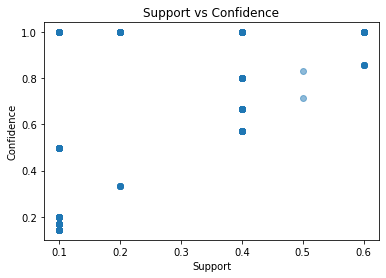

In [19]:
plt.scatter(rules.support, rules.confidence, alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()
#between support and confidence

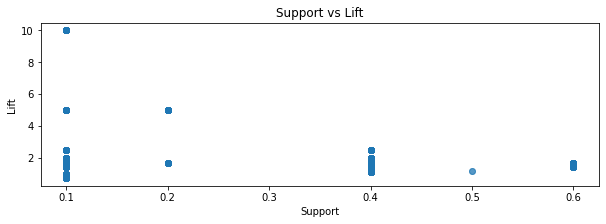

In [21]:
# Plot between support and lift
plt.figure(figsize = [10,3])
plt.scatter(rules.support, rules.lift, alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()

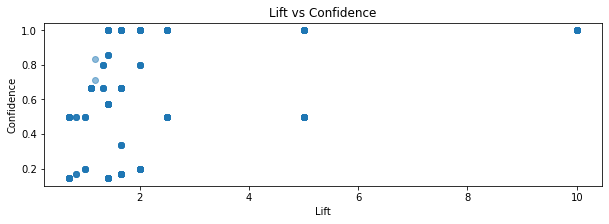

In [23]:
# Plot between lift and confidence
plt.figure(figsize = [10,3])
plt.scatter(rules.lift, rules.confidence, alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [26]:
freq_sets = apriori(df, min_support = 0.3, use_colnames = True)
freq_sets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V3_Sixth Sense, Gladiator, Patriot, Sixth Sen..."
59,0.4,"(V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt..."
60,0.4,"(V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ..."
61,0.4,"(V3_Sixth Sense, V1_Gladiator, Gladiator, Patr..."


In [27]:
rules2 = association_rules(freq_sets, metric = 'confidence', min_threshold = 0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
574,(V3_Sixth Sense),"(V1_Gladiator, Gladiator, Patriot, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
575,(V1_Gladiator),"(V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
576,(Patriot),"(V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
577,(Sixth Sense),"(V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [28]:
rule_lift = association_rules(freq_sets, metric = 'lift', min_threshold = 0.6)
rule_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V1_Gladiator),"(V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Gladiator),"(V3_Sixth Sense, V1_Gladiator, Patriot, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(Patriot),"(V3_Sixth Sense, V1_Gladiator, Gladiator, Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Sixth Sense),"(V3_Sixth Sense, V1_Gladiator, Gladiator, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


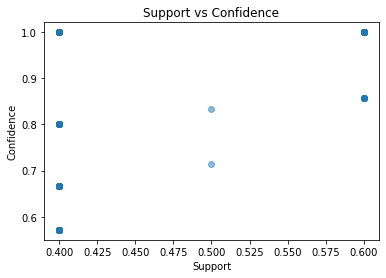

In [29]:
# Plot of Support vs confidence
plt.scatter(rule_lift['support'],rule_lift['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

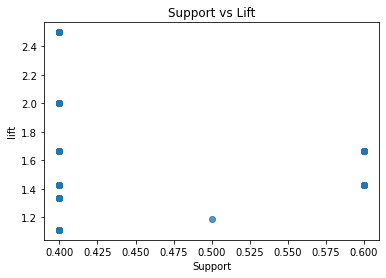

In [30]:
plt.scatter(rule_lift['support'],rule_lift['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

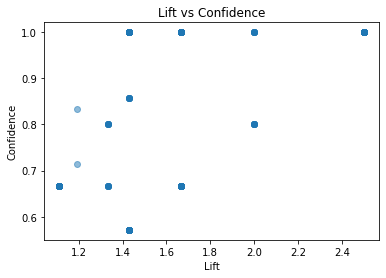

In [31]:
plt.scatter(rule_lift['lift'],rule_lift['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [33]:
freq_set1 = apriori(df, min_support = 0.5, use_colnames = True)
freq_set1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [34]:
rules3 = association_rules(freq_set1, metric = 'confidence', min_threshold = 0.65)
rules3
# Creating rules for 67% confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [35]:
rules_lift1 = association_rules(freq_set1, metric = 'lift', min_threshold = 0.67)
rules_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


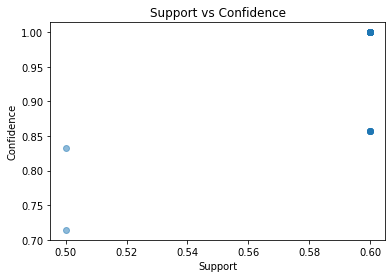

In [36]:
plt.scatter(rules_lift1['support'],rules_lift1['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

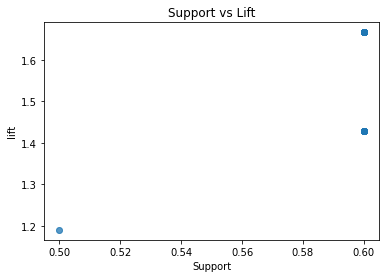

In [37]:
plt.scatter(rules_lift1['support'],rules_lift1['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

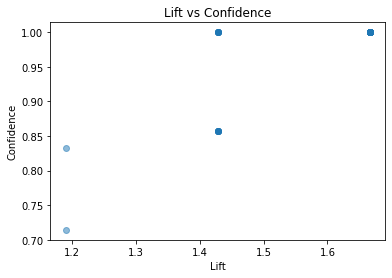

In [38]:
plt.scatter(rules_lift1['lift'],rules_lift1['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [39]:
rules_lift1.sort_values('lift', ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V1_Gladiator, Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
